## 1. Project Title :
- Exploratory Data Analysis (EDA) on Titanic Dataset

## 2. Objective: 
- To Perform Explotory Data Analysis (EDA) on Titanic dataset to identify survival patterns using various visualizations.

## 3. Dataset Columns Used:
### Columns Description :
- PassengerID: Unique ID for each passenger
- Name: Name of the passenger
- Age: Age of the passenger
- Gender: Gender of the passenger
- Class: Passenger class (1, 2, 3)
- Survived: 1 = Yes, 0 = No

## 4. Import Required Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 5. Load and Preprocess the Data

In [13]:
# Load the dataset
df = pd.read_csv("titanic.csv")

# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Select only required columns
df = df[['PassengerId', 'Name', 'Age', 'Sex', 'Pclass', 'Survived']]

# Show the first 5 rows
df.head()

,PassengerId,Name,Age,Sex,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1
2,3,"Heikkinen, Miss. Laina",26.0,female,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1
4,5,"Allen, Mr. William Henry",35.0,male,3,0


In [15]:
import warnings
warnings.filterwarnings('ignore') # This will ignore ALL warnings

# Rename the column name to get the required input 
df.rename(columns={'PassengerId': 'PassengerID',
                   'Sex': 'Gender',
                   'Pclass': 'Class'}, inplace=True)

In [16]:
df.head()

,PassengerID,Name,Age,Gender,Class,Survived
0,1,"Braund, Mr. Owen Harris",22.0,male,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1
2,3,"Heikkinen, Miss. Laina",26.0,female,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1
4,5,"Allen, Mr. William Henry",35.0,male,3,0


In [17]:
# To get a random row
df.sample()

,PassengerID,Name,Age,Gender,Class,Survived
417,418,"Silven, Miss. Lyyli Karoliina",18.0,female,2,1


In [18]:
df.shape   # no. of rows and columns

(891, 6)

In [19]:
# Basic information of the titanic Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerID  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Age          714 non-null    float64
 3   Gender       891 non-null    object 
 4   Class        891 non-null    int64  
 5   Survived     891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [20]:
# It generates descriptive statistics
df.describe()

,PassengerID,Age,Class,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,2.308642,0.383838
std,257.353842,14.526497,0.836071,0.486592
min,1.000000,0.420000,1.000000,0.000000
25%,223.500000,20.125000,2.000000,0.000000
50%,446.000000,28.000000,3.000000,0.000000
75%,668.500000,38.000000,3.000000,1.000000
max,891.000000,80.000000,3.000000,1.000000


In [21]:
# Check the missing values
df.isnull().sum()

PassengerID      0
Name             0
Age            177
Gender           0
Class            0
Survived         0
dtype: int64

In [22]:
# handling the missing values with median
df['Age'] = df['Age'].fillna(df['Age'].median())  # fill missing Age values with median

# Cross check the missing values
df['Age'].isnull().sum()

np.int64(0)

## 6. Data Visualization (as required)

In [24]:
sns.set(style='whitegrid', palette='pastel')

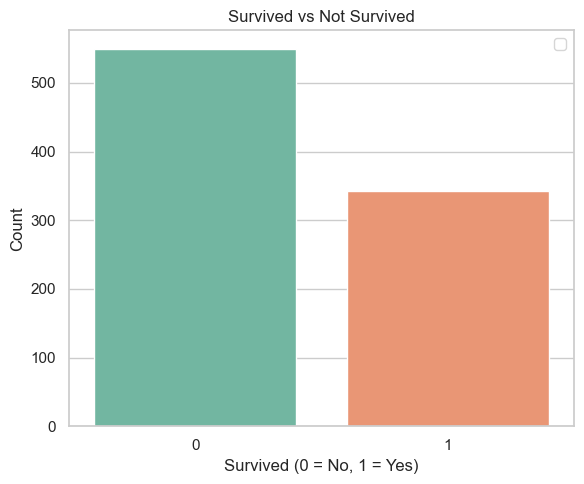

In [25]:
# ===========================================
#  A. Countplot - Survived vs Not Survived
# ===========================================

plt.figure(figsize=(6, 5))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survived vs Not Survived')
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig('survival_count.png') 
plt.show()  

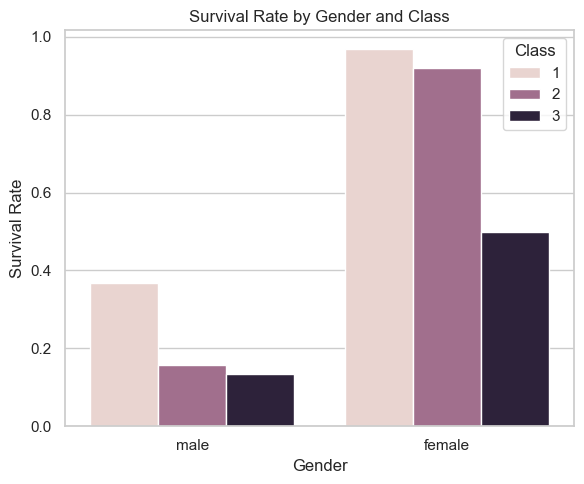

In [26]:
# ===========================================
#  B. Bar Plot - Survival by Gender and Class
# ===========================================

plt.figure(figsize=(6, 5))
sns.barplot(x='Gender', y='Survived', hue='Class', data=df, ci=None)
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.savefig('survival_by_gender_class.png')
plt.show()

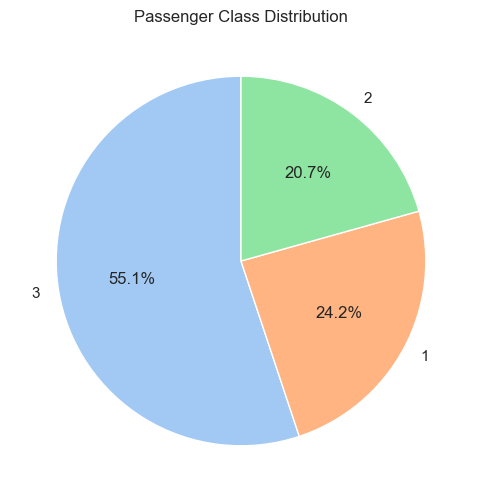

In [27]:
# ==================================
#  C. Pie Chart - Class Distribution
# ==================================

plt.figure(figsize=(6, 6))
class_counts = df['Class'].value_counts()
colors = sns.color_palette("pastel")
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Passenger Class Distribution")
plt.savefig('class_distribution.png')   
plt.show()

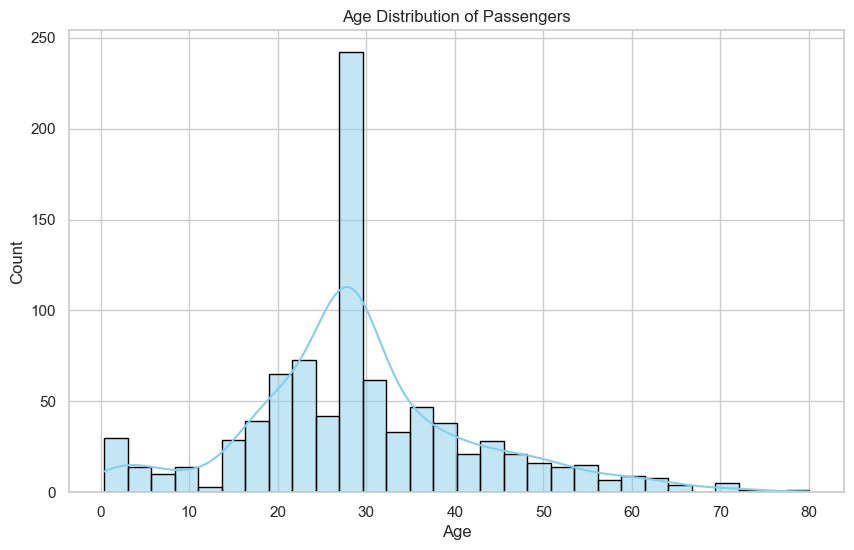

In [53]:
# ================================
#  D. Histogram - Age Distribution
# ================================


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, color='skyblue', edgecolor='black', kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel('Age')         
plt.ylabel('Count')  
plt.savefig('age_distribution.png')  
plt.show()

In [29]:
# ==========================
#  Final Insights
# ==========================
print("\n Key Insights:")
print("- Females had a much higher survival rate than males.")
print("- First-class passengers had better survival rates.")
print("- Most passengers were aged between 20 and 40.")
print("- Third-class had the highest number of passengers.")


 Key Insights:
- Females had a much higher survival rate than males.
- First-class passengers had better survival rates.
- Most passengers were aged between 20 and 40.
- Third-class had the highest number of passengers.


In [30]:
# =====================
#  Save Cleaned Dataset
# =====================

df.to_csv("titanic_cleaned.csv", index=False)